In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load data dan pre processing
data = pd.read_csv('/content/Seed_Data.csv')
y = data['target'].values
data = data.drop(columns='target')
data.rename(columns={
    'A': 'area',
    'P': 'perimeter',
    'C': 'compactness',
    'LK': 'length of kernel',
    'WK': 'width of kernel',
    'LKG': 'length of kernel groove'
}, inplace=True)
data.head(10)

,area,perimeter,compactness,length of kernel,width of kernel,A_Coef,length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533


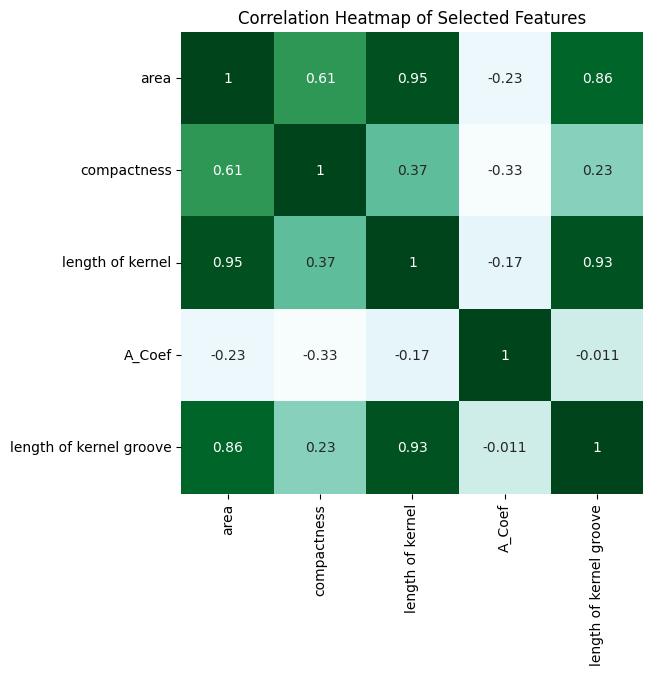

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(X, columns=data_drop.columns).corr(), square=True, annot=True, cbar=False, cmap='BuGn')
plt.title("Correlation Heatmap of Selected Features")
plt.show()

In [ ]:
# Berdasarkan korelasi dan pengetahuan domain, hapus 'perimeter' dan 'lebar kernel'
data_drop = data.drop(columns=['perimeter', 'width of kernel'])
X = data_drop.values
data_drop

,area,compactness,length of kernel,A_Coef,length of kernel groove
0,15.26,0.8710,5.763,2.221,5.220
1,14.88,0.8811,5.554,1.018,4.956
2,14.29,0.9050,5.291,2.699,4.825
3,13.84,0.8955,5.324,2.259,4.805
4,16.14,0.9034,5.658,1.355,5.175
...,...,...,...,...,...
205,12.19,0.8783,5.137,3.631,4.870
206,11.23,0.8511,5.140,4.325,5.003
207,13.20,0.8883,5.236,8.315,5.056
208,11.84,0.8521,5.175,3.598,5.044


In [ ]:
# Implementasi Manual
def manual_kmeans(X, k=3, max_iters=100, tol=1e-4, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    clusters = np.zeros(n_samples, dtype=int)
    for _ in range(max_iters):
        for i in range(n_samples):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            clusters[i] = np.argmin(distances)
        new_centroids = np.array([X[clusters == idx].mean(axis=0) if np.any(clusters == idx) else centroids[idx] for idx in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return clusters, centroids
def manual_accuracy_score(true_labels, pred_labels):
    return np.mean(true_labels == pred_labels)
def manual_confusion_matrix(true_labels, pred_labels, n_classes=3):
    matrix = np.zeros((n_classes, n_classes), dtype=int)
    for t, p in zip(true_labels, pred_labels):
        matrix[t, p] += 1
    return matrix

In [ ]:
from collections import Counter
def manual_mode(labels):
    if len(labels) == 0:
        return None
    count = Counter(labels)
    return count.most_common(1)[0][0]
def relabel_clusters(true_labels, cluster_assignments, n_clusters=3):
    new_labels = np.zeros_like(cluster_assignments)
    for cluster_id in range(n_clusters):
        mask = cluster_assignments == cluster_id
        if np.any(mask):
            common_label = manual_mode(true_labels[mask])
            new_labels[mask] = common_label
    return new_labels
def calculate_inertia(X, k, centroids, clusters):
    inertia = 0
    for i in range(k):
        cluster_points = X[clusters == i]
        inertia += np.sum(np.linalg.norm(cluster_points - centroids[i], axis=1) ** 2)
    return inertia

In [ ]:
def manual_elbow_method(X, max_k=7):
    inertias = []
    for k in range(1, max_k + 1):
        clusters, centroids = manual_kmeans(X, k=k)
        inertia = calculate_inertia(X, k, centroids, clusters)
        inertias.append(inertia)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), inertias, 'o-', color='#4c72b0')
    plt.xlabel('Number of Clusters k')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.title('Elbow Method For Optimal k')
    plt.grid(True)
    plt.show()

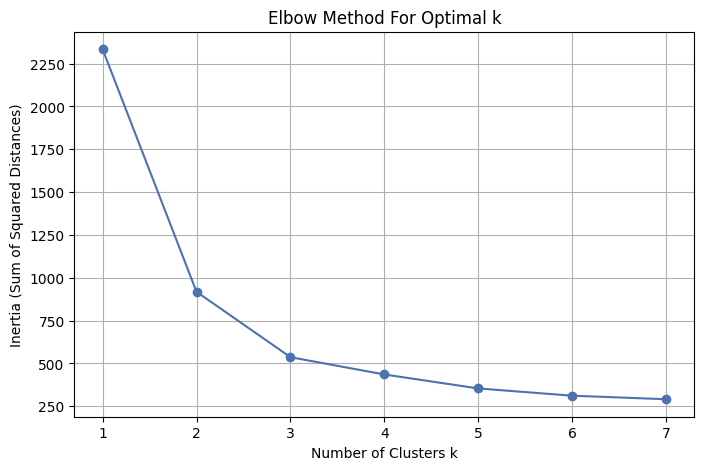

In [ ]:
manual_elbow_method(X, max_k=7)
# Jalankan KMeans dengan k=3
clusters, centroids = manual_kmeans(X, k=3)
labels = relabel_clusters(y, clusters, n_clusters=3)

In [ ]:
# Hitung confusion matrix
matrix = manual_confusion_matrix(y, labels, n_classes=3)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[61  1  8]
 [ 9 61  0]
 [ 4  0 66]]


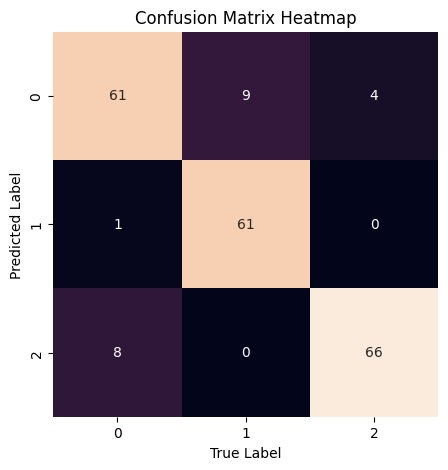

In [ ]:
# Visualize confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Hitung accuracy
accuracy = manual_accuracy_score(y, labels)
print(f"Manual KMeans Accuracy: {accuracy:.4f}")

Manual KMeans Accuracy: 0.8952
